In [12]:
'''
Code to generate the data summarization plots used in slides
'''
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
tqdm().pandas()
puzzle_data = pd.read_csv(META_FILE, sep='\t')

In [14]:
#Load the dataset of attempts data
attempts = pd.read_csv("/w/225/1/chess/tactics/glicko_user_tactics_problem.csv_00",nrows=10000)
#Load the puzzle metadata
full_puzzle_data = pd.read_csv('../tactics_problem_singletag.csv')

In [15]:
#Join the attempts data with the rating and tag from the puzzle metadata
attempts = pd.merge(attempts,full_puzzle_data[['tactics_problem_id','tag','rating']],how='inner',on='tactics_problem_id')

In [16]:
#Get the number of attempts made per tag
tag_counts = attempts.groupby('tag')['tactics_problem_id'].count()

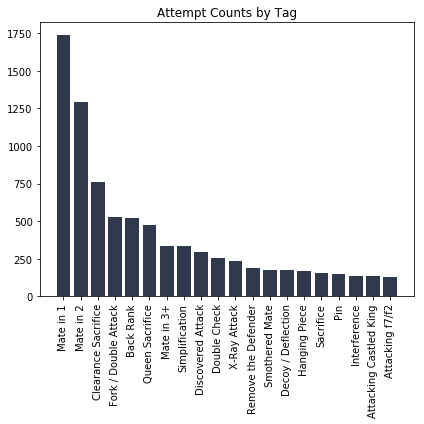

In [17]:
#Get a bar plot of attempts made per tag
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
sorted_counts = tag_counts.sort_values(ascending=False)[:20]
ax.bar(sorted_counts.index, sorted_counts.values, 0.8,color='#31394d')
ax.set_xticklabels(sorted_counts.index,rotation='vertical')
plt.title("Attempt Counts by Tag")
plt.tight_layout()
#plt.savefig('../plots/presentation/tag_attempt_counts')

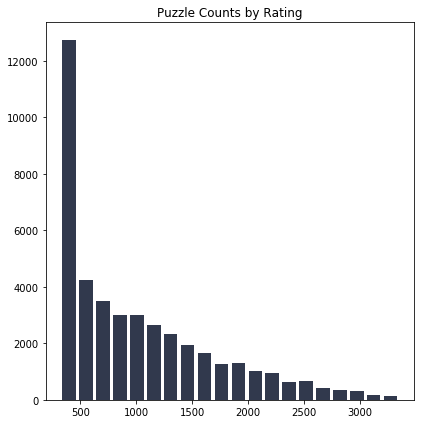

In [18]:
#Get a histogram of puzzle ratings from the metadata
ratings = full_puzzle_data['rating']
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(ratings.values,align='left',rwidth=0.8,histtype='barstacked',bins=20,color='#31394d')
plt.title("Puzzle Counts by Rating")
plt.tight_layout()
#plt.savefig('../plots/presentation/puzzle_rating_counts')

In [19]:
#Get average ratings of users
user_ratings = attempts.groupby('user_hash')['ratingUser'].agg('mean')

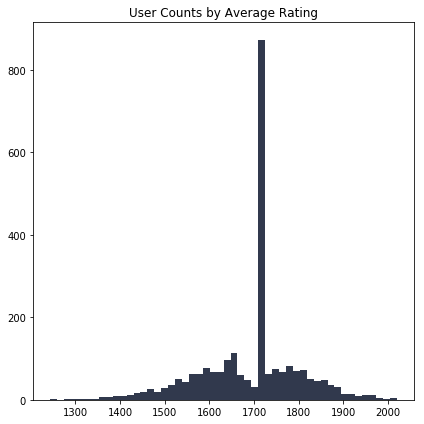

In [20]:
#Get a histogram of average rating per user
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(user_ratings.values,align='left',bins=50,color='#31394d')
#ax.set_xticklabels(np.arange(0,max(ratings),20))
plt.title("User Counts by Average Rating")
plt.tight_layout()
#plt.savefig('../plots/presentation/player_rating_counts.png')

In [21]:
#Get counts of successful and failed attempts
win_loss = attempts.groupby('is_passed')['tactics_problem_id'].count()

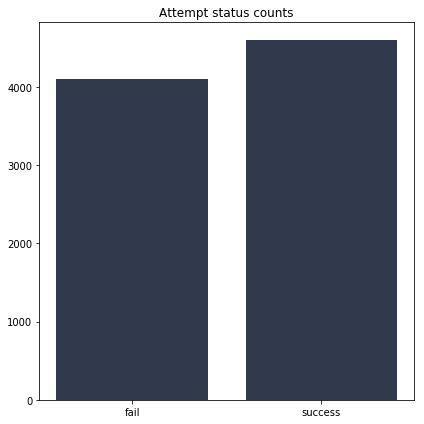

In [22]:
#Bar plot of counts of win and faield attempts at puzzles
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
ax.bar(['fail','success'],win_loss.values,0.8,color='#31394d')
plt.title("Attempt status counts")
plt.tight_layout()
#plt.savefig('../plots/presentation/attempt_status_counts')